In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_India'

page = requests.get(url)

In [3]:
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.text , 'html')

In [5]:
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in India - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disa

In [31]:
table = soup.find_all('table')[0]

In [32]:
soup.find_all('th') == table.find_all('th')

False

In [33]:
word_title = table.find_all('th')
word_title

[<th align="center">Rank
 </th>,
 <th align="center">Name
 </th>,
 <th align="center">Industry
 </th>,
 <th align="center">Revenue<br/>(billions <br/>US$)
 </th>,
 <th align="center">Headquarters
 </th>]

In [34]:
heading = [title.text.strip().strip() for title in word_title]

In [35]:
len(heading)

5

In [36]:
import pandas as pd

In [37]:
df = pd.DataFrame(columns=heading)

In [38]:
df

,Rank,Name,Industry,Revenue(billions US$),Headquarters


In [39]:
col = table.find_all('tr')


In [40]:
z=0
for row in col:
    row_data = row.find_all('td')
    indivisual_row = [data.text.strip() for data in row_data]
    if len(indivisual_row) > 0:
        # Remove elements at index 1 and 2 (make sure the list is long enough)
        if len(indivisual_row) > 2:
            del indivisual_row[1]
            del indivisual_row[2]
            print(indivisual_row)
            z = z + 1
    if len(indivisual_row) == len(df.columns):
        df.loc[len(df)] = indivisual_row
    else:
        print(f"Skipping row due to column mismatch: {indivisual_row}")
z

Skipping row due to column mismatch: []
['1', 'Conglomerate', 'Mumbai']
Skipping row due to column mismatch: ['1', 'Conglomerate', 'Mumbai']
['2', 'Oil and gas', 'New Delhi']
Skipping row due to column mismatch: ['2', 'Oil and gas', 'New Delhi']
['3', 'Banking', 'Mumbai']
Skipping row due to column mismatch: ['3', 'Banking', 'Mumbai']
['4', 'Oil and gas', 'New Delhi']
Skipping row due to column mismatch: ['4', 'Oil and gas', 'New Delhi']
['5', 'Oil and gas', 'Mumbai']
Skipping row due to column mismatch: ['5', 'Oil and gas', 'Mumbai']
['6', 'Banking', 'Mumbai']
Skipping row due to column mismatch: ['6', 'Banking', 'Mumbai']
['4', 'Banking', 'Mumbai']
Skipping row due to column mismatch: ['4', 'Banking', 'Mumbai']
['5', 'Banking', 'Mumbai']
Skipping row due to column mismatch: ['5', 'Banking', 'Mumbai']
['7', 'Financials', 'Mumbai']
Skipping row due to column mismatch: ['7', 'Financials', 'Mumbai']
['9', 'Infotech', 'Mumbai']
Skipping row due to column mismatch: ['9', 'Infotech', 'Mumba

52

In [41]:
# for x in range(1,50):
    # df = df.drop(index=x,axis=0)


df = df[df.index.isin(range(52, 105))]


In [42]:
df

,Rank,Name,Industry,Revenue(billions US$),Headquarters


In [43]:
df.describe()

,Rank,Name,Industry,Revenue(billions US$),Headquarters
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


In [44]:
df.to_csv('companies.csv')

### enough with the data scrapping now lets work on visualisation

we will use matplotlib for plotting

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
df = pd.read_csv('companies.csv')

In [47]:
df.columns

Index(['Unnamed: 0', 'Rank', 'Name', 'Industry', 'Revenue(billions US$)',
       'Headquarters'],
      dtype='object')

In [48]:
df = df.drop('Unnamed: 0',axis=1)

In [49]:
df.describe()

,Rank,Name,Industry,Revenue(billions US$),Headquarters
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   0 non-null      object
 1   Name                   0 non-null      object
 2   Industry               0 non-null      object
 3   Revenue(billions US$)  0 non-null      object
 4   Headquarters           0 non-null      object
dtypes: object(5)
memory usage: 124.0+ bytes


In [51]:
df.isna().sum()

Rank                     0
Name                     0
Industry                 0
Revenue(billions US$)    0
Headquarters             0
dtype: int64

In [52]:
df['Revenue(billions US$)'].sum()

0

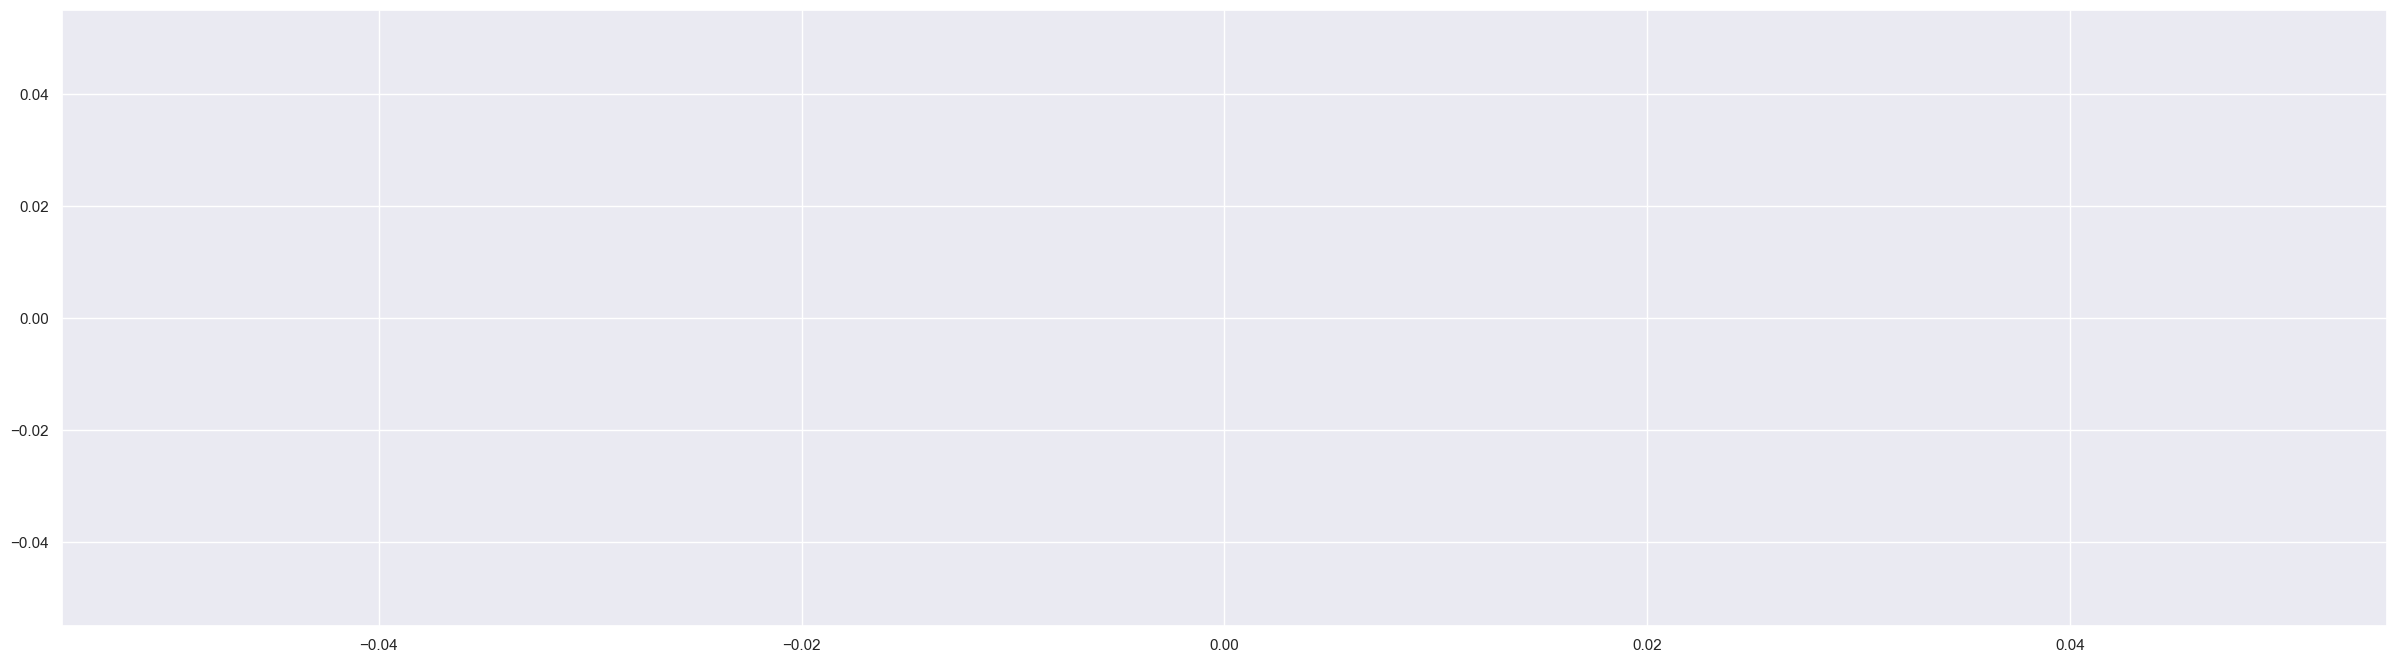

In [53]:
fig, ax = plt.subplots(figsize=(30, 8))
bars = ax.bar(df['Name'],df['Revenue(billions US$)'])


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')


ValueError: first array argument cannot be empty

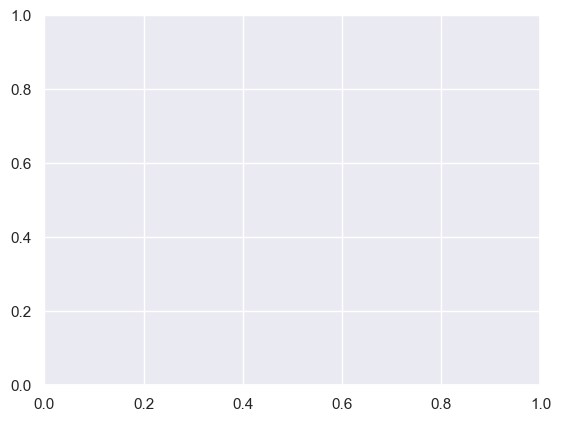

In [54]:
plt.acorr(df['Revenue(billions US$)'],maxlags=1)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()